In [ ]:
import csv

### Lettura del dataset

In [2]:
columns = []
pokemon_dataset = []
with open('pokemon.csv') as file:
    print(type(file))
    reader = csv.reader(file)
    print(type(reader))
    columns = next(reader)
    for row in reader:
        pokemon_dataset.append(row)

print(row)

<class '_io.TextIOWrapper'>
<class '_csv.reader'>
['721', 'Volcanion', 'Fire', 'Water', '600', '80', '110', '120', '130', '90', '70', '6', 'True']


In [3]:
for i in row:
    print(i)

721
Volcanion
Fire
Water
600
80
110
120
130
90
70
6
True


### Elenco dei Pokemon con nome e generazione

In [4]:
for i in pokemon_dataset:
    print(f"{i[0]} - {i[1]} (gen. {i[11]})")


1 - Bulbasaur (gen. 1)
2 - Ivysaur (gen. 1)
3 - Venusaur (gen. 1)
3 - VenusaurMega Venusaur (gen. 1)
4 - Charmander (gen. 1)
5 - Charmeleon (gen. 1)
6 - Charizard (gen. 1)
6 - CharizardMega Charizard X (gen. 1)
6 - CharizardMega Charizard Y (gen. 1)
7 - Squirtle (gen. 1)
8 - Wartortle (gen. 1)
9 - Blastoise (gen. 1)
9 - BlastoiseMega Blastoise (gen. 1)
10 - Caterpie (gen. 1)
11 - Metapod (gen. 1)
12 - Butterfree (gen. 1)
13 - Weedle (gen. 1)
14 - Kakuna (gen. 1)
15 - Beedrill (gen. 1)
15 - BeedrillMega Beedrill (gen. 1)
16 - Pidgey (gen. 1)
17 - Pidgeotto (gen. 1)
18 - Pidgeot (gen. 1)
18 - PidgeotMega Pidgeot (gen. 1)
19 - Rattata (gen. 1)
20 - Raticate (gen. 1)
21 - Spearow (gen. 1)
22 - Fearow (gen. 1)
23 - Ekans (gen. 1)
24 - Arbok (gen. 1)
25 - Pikachu (gen. 1)
26 - Raichu (gen. 1)
27 - Sandshrew (gen. 1)
28 - Sandslash (gen. 1)
29 - Nidoranâ™€ (gen. 1)
30 - Nidorina (gen. 1)
31 - Nidoqueen (gen. 1)
32 - Nidoranâ™‚ (gen. 1)
33 - Nidorino (gen. 1)
34 - Nidoking (gen. 1)
35 - Clefai

### Elenco dei campi disponibili per ogni pokemon

In [5]:
for column, parameter in zip(columns, pokemon_dataset[0]):
    print(f"{column:10} -> {parameter:15} ({type(parameter)})")

#          -> 1               (<class 'str'>)
Name       -> Bulbasaur       (<class 'str'>)
Type 1     -> Grass           (<class 'str'>)
Type 2     -> Poison          (<class 'str'>)
Total      -> 318             (<class 'str'>)
HP         -> 45              (<class 'str'>)
Attack     -> 49              (<class 'str'>)
Defense    -> 49              (<class 'str'>)
Sp. Atk    -> 65              (<class 'str'>)
Sp. Def    -> 65              (<class 'str'>)
Speed      -> 45              (<class 'str'>)
Generation -> 1               (<class 'str'>)
Legendary  -> False           (<class 'str'>)


Purtroppo tutti i campi sono letti come stringa. Dobbiamo convertire in numero le colonne da `HP` a `Speed`

In [6]:
num_indexes = [5, 6, 7, 8, 9, 10]

numerical_data = []
for row in pokemon_dataset:
    num_row = []
    for col in num_indexes:
        num_row.append(float(row[col]))

    numerical_data.append(num_row)

for k, v in zip(columns[5:11], numerical_data[0]):
    print(f"{k:10} -> {v:5} ({type(v)})")

HP         ->  45.0 (<class 'float'>)
Attack     ->  49.0 (<class 'float'>)
Defense    ->  49.0 (<class 'float'>)
Sp. Atk    ->  65.0 (<class 'float'>)
Sp. Def    ->  65.0 (<class 'float'>)
Speed      ->  45.0 (<class 'float'>)


Normalizzare significa portare tutti i valori su una scala comune.


In [7]:
def normalize(dataset):
    output = []

    min_max = []

    for i in range(len(dataset[0])):
        # per ciascuna colonna:
            # prendiamo tutti i valori di quella colonna nel dataset
            # calcoliamo val. minimo e max della colonna
            # add della tupla min/max della colonna alla lista min_max
        col_values = [row[i] for row in dataset]
        min_max.append((min(col_values), max(col_values)))

    print(min_max)
    for row in dataset:
        scaled_row = []
        for col_index in range(len(row)):
            col_value = row[col_index]
            scaled_value = (col_value - min_max[col_index][0])/(min_max[col_index][1] - min_max[col_index][0]+1e-12)
            scaled_row.append(scaled_value)

        output.append(scaled_row)

    return output


def euclidean_distance(p1, p2):
        # https://rittikghosh.com/images/min.png
        # p = 1 -> Manhattan Distance
        # p = 2 -> Euclidean Distance
        dim = len(p1)
        distance = 0
        for p,q in zip(p1,p2):
            distance += ((p - q) ** 2)
        distance=distance**(1/2)
        return distance

'''
    Questa funzione ci restituisce una lista di lunghezza pari a K 
    contenente una serie di tuple in cui abbiamo:
        - indice i dell'elemento nel dataset
        - distanza della riga test_row dall'elemento con indice i
'''
def get_k_neighbors(k, dataset, test_row):
    dataset.append(test_row)
    norm_dataset = normalize(dataset)
    norm_test_row = norm_dataset[-1]
    norm_dataset = norm_dataset[:-1]

    distances = []

    for i in range(len(norm_dataset)):
        row = norm_dataset[i]
        d = euclidean_distance(norm_test_row, row)
        distances.append((i, d))


    distances.sort(key=lambda tup: tup[1])

    return distances[:k]

def print_pokemon_info(i):
    s = f"{pokemon_dataset[i][0]} - {pokemon_dataset[i][1]}, di tipo {pokemon_dataset[i][2]} (gen. {pokemon_dataset[i][-2]})"
    if pokemon_dataset[i][-1] == "True":
        s += f"\n - POKEMON LEGGENDARIO"

    for k in num_indexes:
        s += f"\n{columns[k]:20}: {pokemon_dataset[i][k]}"
    return s

Prendiamo in input i dati dell'utente (Questa si può migliorare)

In [8]:
user_row = []

k = 5

min_max = []

for i in range(len(numerical_data[0])):
    col_values = [row[i] for row in numerical_data]
    min_max.append((min(col_values), max(col_values)))

for n,col_index in enumerate(num_indexes):
    v = input(f"Inserisci il tuo valore di {columns[col_index]} (tra {min_max[n][0]} e {min_max[n][1]} )\n")
    user_row.append(float(v))

for k, v in zip(columns[5:11], user_row):
    print(f"{k:10} -> {v:15} ({type(v)})")

print("Calcolo i tuoi pokemon più affini...")

l = get_k_neighbors(5, numerical_data, user_row)
print(l)

for p in l:
    print(print_pokemon_info(p[0]))

HP         ->            50.0 (<class 'float'>)
Attack     ->            65.0 (<class 'float'>)
Defense    ->            82.0 (<class 'float'>)
Sp. Atk    ->           100.0 (<class 'float'>)
Sp. Def    ->            30.0 (<class 'float'>)
Speed      ->            90.0 (<class 'float'>)
Calcolo i tuoi pokemon più affini...
[(1.0, 255.0), (5.0, 190.0), (5.0, 230.0), (10.0, 194.0), (20.0, 230.0), (5.0, 180.0)]
[(126, 0.20463673019133383), (531, 0.36000102587058935), (489, 0.37314205289556035), (609, 0.40551183599112206), (192, 0.412664037588719)]
117 - Seadra, di tipo Water (gen. 1)
HP                  : 55
Attack              : 65
Defense             : 95
Sp. Atk             : 95
Sp. Def             : 45
Speed               : 85
479 - Rotom, di tipo Electric (gen. 4)
HP                  : 50
Attack              : 50
Defense             : 77
Sp. Atk             : 95
Sp. Def             : 77
Speed               : 91
441 - Chatot, di tipo Normal (gen. 4)
HP                  : 76
Attack    

In [20]:
images_paths = [ f"resized/{pokemon_dataset[p[0]][0]}.jpg" for p in l ]
print(images_paths)
import ipyplot

ipyplot.plot_images(images_paths, labels=[ pokemon_dataset[p[0]][1] for p in l ], max_images=5, img_width=150)



['resized/117.jpg', 'resized/479.jpg', 'resized/441.jpg', 'resized/549.jpg', 'resized/178.jpg']


--------------------------------------------------
1
Seadra


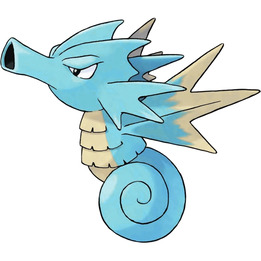

--------------------------------------------------
--------------------------------------------------
2
Rotom


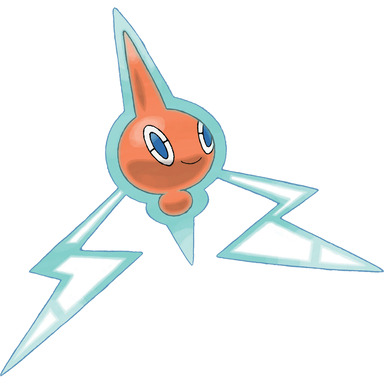

--------------------------------------------------
--------------------------------------------------
3
Chatot


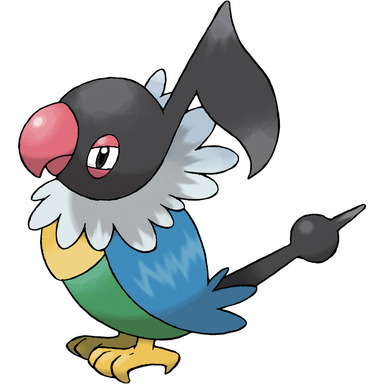

--------------------------------------------------
--------------------------------------------------
4
Lilligant


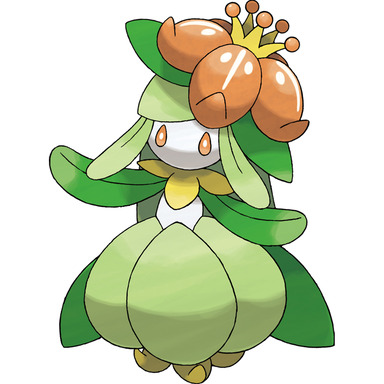

--------------------------------------------------
--------------------------------------------------
5
Xatu


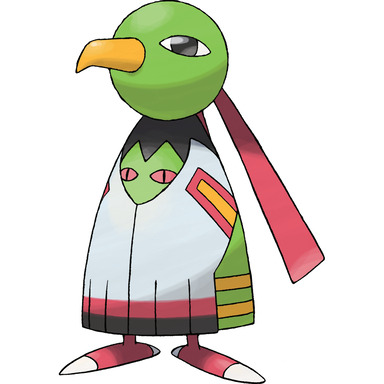

--------------------------------------------------


In [27]:
from IPython.display import Image

for n,p in enumerate(l):
    print('-'*50)
    print(n+1)
    print(pokemon_dataset[p[0]][1])
    display(Image(f"resized/{pokemon_dataset[p[0]][0]}.jpg"))
    print('-'*50)